<center>
    
# 2D Population Dynamics

### Juan Sebastian Sierra Jaraba - jsierraj@unal.edu.co 
### Departamento de Física, Facultad de Ciencias, Sede Bogotá
### Universidad Nacional de Colombia
    
</center>

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [92]:
#Constants
L, T, h, dt = 1, 1, 10**(-2), 10**(-4)
Nl, Nt = int(L//h + 1), int(T//dt + 1)

alpha = 10
beta = 1
gamma = 1
delta = 1
epsilon = 1
zeta = 1
eta = 1
theta = 1
iota = 1
kappa = 1

In [93]:
#Auxiliar functions

def Laplacian(A, h):
    xlim, ylim = A.shape
    
    return (A[np.arange(1,xlim+1)%xlim, ::] + A[np.arange(-1,xlim-1)%xlim, ::] + A[::, np.arange(1,ylim+1)%ylim] + A[::, np.arange(-1,ylim-1)%ylim] - 4*A)/h**2

def grad(A, h):
    xlim, ylim = A.shape
    
    nabla_x = (A[np.arange(1,xlim+1)%xlim, ::] - A[np.arange(-1,xlim-1)%xlim, ::])/h
    nabla_y = (A[::, np.arange(1,ylim+1)%ylim] - A[::, np.arange(-1,ylim-1)%ylim])/h
    
    return np.transpose(np.array((nabla_x, nabla_y)), (1,2,0))
    
def dot(A, B):
    return np.sum(A*B, 2)

Ecuación de densidades poblacionales de vegetación $V$, presa $P$ y depredador $D$ sobre un mapa:

$$
\begin{align}
\frac{\partial V}{\partial t} &= V(\alpha - \beta P - \gamma V) \\
\frac{\partial P}{\partial t} + \vec{\nabla} \cdot \vec{J}_P &= P(\delta V - \varepsilon D) \\
\frac{\partial D}{\partial t} + \vec{\nabla} \cdot \vec{J}_D &= D(\zeta P - \eta)
\end{align}
$$

Densidades de corriente de depredadores y presas:

$$ 
\begin{align}
\vec{J}_P &= P\vec{v_P} = P(\theta\vec{\nabla}V - \iota\vec{\nabla}D) \\
\vec{J}_D &= D\vec{v_D} = D\kappa\vec{\nabla}P 
\end{align}
$$

Donde $\alpha$, $\beta$, $\gamma$, $\delta$, $\varepsilon$, $\zeta$, $\eta$, $\theta$, $\iota$ y $\kappa$ son constantes.

Ecuaciones completas:

$$
\begin{align}
\frac{\partial V}{\partial t} &= V(\alpha - \beta P - \gamma V) \\
\frac{\partial P}{\partial t} &= P(\delta V - \varepsilon D) - \theta(P\vec{\nabla}²V + \vec{\nabla}P\cdot\vec{\nabla}V) + \iota(P\vec{\nabla}²D + \vec{\nabla}P\cdot\vec{\nabla}D)\\
\frac{\partial D}{\partial t} &= D(\zeta P - \eta) - \kappa(D\vec{\nabla}²P + \vec{\nabla}D\cdot\vec{\nabla}P)
\end{align}
$$


In [94]:
#X=(V,P,D) ---> X' = phi(X, t)
def phi(X, dt, h, alpha, beta, gamma, delta, epsilon, zeta, eta, theta, iota, kappa):
    dV = X[0]*(alpha-beta*X[1]-gamma*X[0])
    dP = X[1]*(delta*X[0]-epsilon*X[2]-theta*Laplacian(X[0],h)+iota*Laplacian(X[2],h)) - dot(grad(X[1],h), theta*grad(X[0],h)-iota*grad(X[2],h))
    dD = X[2]*(zeta*X[1]-eta-kappa*Laplacian(X[1],h)) - kappa*dot(grad(X[2],h), grad(X[1],h))
    
    return np.array((dV, dP, dD))

In [95]:
#Solution with Runge-Kutta 4

def solve(X_0, dt, h, alpha, beta, gamma, delta, epsilon, zeta, eta, theta, iota, kappa):
    
    X = np.zeros((Nt, 3, Nl, Nl))
    X[0] = X_0
    func = lambda X: phi(X, dt, h, alpha, beta, gamma, delta, epsilon, zeta, eta, theta, iota, kappa)
    
    for ii in range(Nt-1):
        k1 = func(X[ii])
        k2 = func(X[ii]+k1*dt/2)
        k3 = func(X[ii]+k2*dt/2)
        k4 = func(X[ii]+k3*dt)
        
        X[ii+1] = X[ii] + (k1+ 2*k2 + 2*k3 + k4)*dt/6
    
    return X

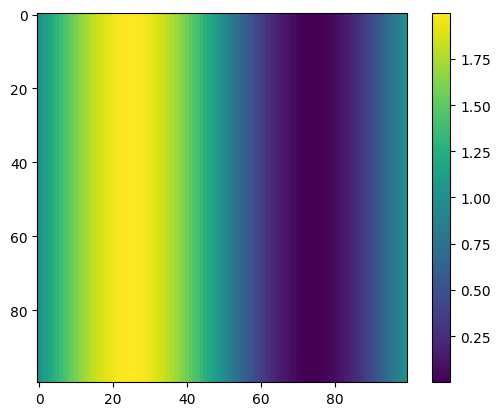

In [110]:
#Initial conditions
x = np.linspace(0,L,Nl)
y = x
x,y = np.meshgrid(x,y)

V = 10*np.ones((Nl,Nl))
P = (1+np.sin(2*np.pi*x/L))
D = (1-np.sin(2*np.pi*x/L))*.1

X_0 = np.array((V, P, D))

plt.imshow(P)
plt.colorbar()

In [111]:
sol = solve(X_0, dt, h, alpha, beta, gamma, delta, epsilon, zeta, eta, theta, iota, kappa)

/tmp/ipykernel_4620/3249592815.py:3: RuntimeWarning: overflow encountered in multiply
  dV = X[0]*(alpha-beta*X[1]-gamma*X[0])
/tmp/ipykernel_4620/3249592815.py:4: RuntimeWarning: overflow encountered in multiply
  dP = X[1]*(delta*X[0]-epsilon*X[2]-theta*Laplacian(X[0],h)+iota*Laplacian(X[2],h)) - dot(grad(X[1],h), theta*grad(X[0],h)-iota*grad(X[2],h))
/tmp/ipykernel_4620/1524718554.py:17: RuntimeWarning: overflow encountered in multiply
  return np.sum(A*B, 2)
/tmp/ipykernel_4620/3249592815.py:4: RuntimeWarning: invalid value encountered in subtract
  dP = X[1]*(delta*X[0]-epsilon*X[2]-theta*Laplacian(X[0],h)+iota*Laplacian(X[2],h)) - dot(grad(X[1],h), theta*grad(X[0],h)-iota*grad(X[2],h))
/tmp/ipykernel_4620/3249592815.py:5: RuntimeWarning: overflow encountered in multiply
  dD = X[2]*(zeta*X[1]-eta-kappa*Laplacian(X[1],h)) - kappa*dot(grad(X[2],h), grad(X[1],h))
/tmp/ipykernel_4620/3249592815.py:5: RuntimeWarning: invalid value encountered in subtract
  dD = X[2]*(zeta*X[1]-eta-kap

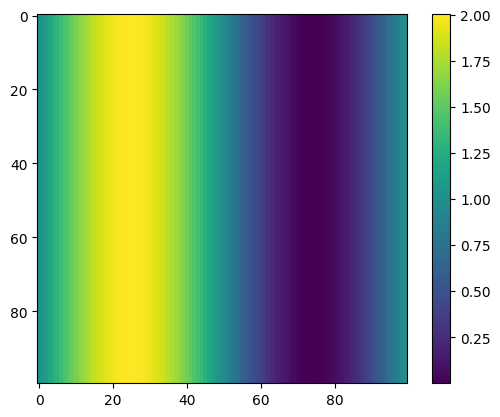

In [122]:
plt.imshow(sol[2][1])
plt.colorbar()